In [1]:
################################
# Scientific imports
################################
import gc
import matplotlib.pyplot as plt
import numpy as np
import fnmatch

################################
# General imports
################################
import csv, math, io, os, os.path, sys, random, time, json
import pandas as pd
import seaborn as sb
from tqdm.notebook import tqdm, trange

################################
# SciKitLearn Imports
################################
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

from IPython.display import display

################################
# MatPlotLib Settings
################################
plt.rcParams["figure.figsize"] = (5,5)
sb.set()

In [2]:
def MakeMatrix(TN, FP, FN, TP):
    Matrix = [[0 for x in range(2)] for y in range(2)]
    Matrix[0][0] = TN
    Matrix[0][1] = FP
    Matrix[1][0] = FN
    Matrix[1][1] = TP
    return(Matrix)

def PlotConfusionMatrix(mat, title):
    
    confMat = sb.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap="rocket",
            xticklabels=['Negative','Positive'],
            yticklabels=['Negative','Positive'],
            annot_kws={"size": 20})
    
    confMat.set_xticklabels(confMat.get_xmajorticklabels(), fontsize = 14)
    confMat.set_yticklabels(confMat.get_ymajorticklabels(), fontsize = 14)
    
    plt.rcParams["figure.figsize"] = (5,5)
    sb.set(font_scale=1.3)
    
    fig = confMat.get_figure() 
    plt.xlabel('Actual Value', fontsize=16, labelpad=10)
    plt.ylabel('Predicted Value', fontsize=16, labelpad=10)
    
    titleText = "Confusion Matrix: "+title
    
    plt.title(titleText)
    
    #plt.show()
    
    targetdest="./confusionmatrices/"
    #plt.savefig(targetdest+"PCA_SVM_Matrix.png")
    plt.savefig("{}ConfusionMatrix_{}.png".format(targetdest,title))

In [3]:
# Reading which LC datafiles we have into a list

jsonList = []

for root, dirs, files in os.walk("./sktime_results/"):
    for file in files:
            
        # Get rid of alpha stuff
        if file.endswith(".json"):
            jsonList.append(os.path.join(root, file))
            #print(os.path.join(root, file))
jsonList.sort()
print("Number of JSON files: {}".format(len(jsonList)))
for num, i in enumerate(jsonList):
    print ("{}: {}".format(num, i))
    

Number of JSON files: 14
0: ./sktime_results/sktime_Arsenal_fitted.json
1: ./sktime_results/sktime_CanonicalIntervalForest_fitted.json
2: ./sktime_results/sktime_ContractableBOSS_fitted.json
3: ./sktime_results/sktime_DrCIF_fitted.json
4: ./sktime_results/sktime_IndividualBOSS_fitted.json
5: ./sktime_results/sktime_IndividualTDE_fitted.json
6: ./sktime_results/sktime_MUSE_fitted.json
7: ./sktime_results/sktime_MatrixProfileClassifier_fitted.json
8: ./sktime_results/sktime_RandomIntervalSpectralForest_fitted.json
9: ./sktime_results/sktime_ShapeDTW_fitted.json
10: ./sktime_results/sktime_SignatureClassifier_fitted.json
11: ./sktime_results/sktime_SupervisedTimeSeriesForest_fitted.json
12: ./sktime_results/sktime_TSFreshClassifier_fitted.json
13: ./sktime_results/sktime_WEASEL_fitted.json


In [4]:
jsondata = [0] * len(jsonList)
for e,i in enumerate(jsonList):
    with open(i) as f:
        jsondata[e] = json.load(f)
#jsondata

In [12]:
algolist = []
algodata = []
for algorithm in jsondata:
    for keys in algorithm:
        algolist.append(keys.split("_fitted")[0])
        #print(keys.split("_fitted")[0])
#algolist = list(set(algolist))
#algolist.sort()
algolist

['Arsenal',
 'CanonicalIntervalForest',
 'ContractableBOSS',
 'DrCIF',
 'IndividualBOSS',
 'IndividualTDE',
 'MUSE',
 'MatrixProfileClassifier',
 'RandomIntervalSpectralForest',
 'ShapeDTW',
 'SignatureClassifier',
 'SupervisedTimeSeriesForest',
 'TSFreshClassifier',
 'WEASEL']

In [13]:
keylist = []

for algorithm in jsondata:
    for keys in algorithm:
        #print(keys, "\n",algorithm[keys],"\n\n")
        keylist.append(algorithm[keys])
        
keylist

[[{'Accuracy': 0.7684578418523372,
   'Precision': 0.6956521739130435,
   'Recall': 0.058394160583941604}],
 [{'Accuracy': 0.8038444735692443,
   'Precision': 0.9090909090909091,
   'Recall': 0.20072992700729927}],
 [{'Accuracy': 0.7706422018348624,
   'Precision': 0.6825396825396826,
   'Recall': 0.07846715328467153}],
 [{'Accuracy': 0.8047182175622543,
   'Precision': 0.9173553719008265,
   'Recall': 0.20255474452554745}],
 [{'Accuracy': 0.6845784185233726,
   'Precision': 0.34843205574912894,
   'Recall': 0.36496350364963503}],
 [{'Accuracy': 0.6845784185233726,
   'Precision': 0.35737704918032787,
   'Recall': 0.3978102189781022}],
 [{'Accuracy': 0.7885539536915683,
   'Precision': 0.7857142857142857,
   'Recall': 0.16058394160583941}],
 [{'Accuracy': 0.6697247706422018,
   'Precision': 0.3015267175572519,
   'Recall': 0.28832116788321166}],
 [{'Accuracy': 0.8007863695937091,
   'Precision': 0.8538461538461538,
   'Recall': 0.20255474452554745}],
 [{'Accuracy': 0.5307994757536042,


In [14]:
columnList = list(keylist[0][0].keys())
columnList

['Accuracy', 'Precision', 'Recall']

In [15]:
jsondatalist = []
for i, x in enumerate(keylist):
    jsondatalist.append(list(list(x)[0].values()))
    
#print(jsondatalist[0])
    
# Convert TP,TF, etc into ints, not strings
for row in jsondatalist:
    for i in range(3, len(row)-1):
        #print(row[i])
        try:
            row[i] = int(row[i])
        except ValueError:
            continue
            print("Row is a time not an int")

In [18]:
df = pd.DataFrame(jsondatalist, columns=columnList, index=algolist)
df

,Accuracy,Precision,Recall
Arsenal,0.768458,0.695652,0.058394
CanonicalIntervalForest,0.803844,0.909091,0.200730
ContractableBOSS,0.770642,0.682540,0.078467
DrCIF,0.804718,0.917355,0.202555
IndividualBOSS,0.684578,0.348432,0.364964
IndividualTDE,0.684578,0.357377,0.397810
MUSE,0.788554,0.785714,0.160584
MatrixProfileClassifier,0.669725,0.301527,0.288321
RandomIntervalSpectralForest,0.800786,0.853846,0.202555
ShapeDTW,0.530799,0.282645,0.624088


In [17]:
# Make New Columns for Metrics

df['sum'] = df.TP + df.TN + df.FP + df.FN

df['accuracy'] = (df.TP + df.TN) / df['sum']
df['precision'] = df.TP / (df.TP+df.FP)
df['recall'] = df.TP / (df.TP+df.FN)

# DROP COLUMNS

df = df.drop(columns=['tstart', 'tfinish', 'tdelta', 'dateran'])

df

AttributeError: 'DataFrame' object has no attribute 'TP'

In [19]:
# Set up a DF for each ML Algo
uniquealgolist = [ x for x in algolist if "_" not in x ]
#uniquealgolist
dfTable = []
for X in uniquealgolist:
    dfTable.append(df[df.index.str.startswith(X)])

In [20]:
dfTable[2]

,Accuracy,Precision,Recall
ContractableBOSS,0.770642,0.68254,0.078467


In [21]:
dfTable[2].iloc[0][0:4]

Accuracy     0.770642
Precision    0.682540
Recall       0.078467
Name: ContractableBOSS, dtype: float64

In [14]:
TN, FP, FN, TP = dfTable[2]['TN'][0], dfTable[2]['FP'][0], dfTable[2]['FN'][0], dfTable[2]['TP'][0]

In [15]:
mat = MakeMatrix(TN, FP, FN, TP)
mat

[[3257, 0], [743, 0]]

In [22]:
def GetJSONList():
    jsonList = []

    for root, dirs, files in os.walk("./confusionmatrices/"):
        for file in files:

            # Get rid of alpha stuff
            if file.endswith(".json"):
                jsonList.append(os.path.join(root, file))
                #print(os.path.join(root, file))
    jsonList.sort()
#    print("Number of JSON files: {}".format(len(jsonList)))
#    for num, i in enumerate(jsonList):
#        print ("{}: {}".format(num, i))
    return(jsonList)

In [23]:
def MakeConfMatrix(jsonfile):
    #Load the data
    with open(jsonfile) as f:
        jf = json.load(f)
    
    # Get the values
    newkeylist = []

    for algorithm in jf:
        algoName = algorithm
        
        for keys in jf[algorithm][0]:
            #print(keys, "\n",TESTJSON[algorithm][0][keys],"\n\n")
            newkeylist.append(jf[algorithm][0][keys])
    
    [TN, FP, FN, TP] = newkeylist[3:7]
    
    mat = MakeMatrix(int(TN), int(FP), int(FN), int(TP))
    PlotConfusionMatrix(mat, algoName)

In [24]:
MakeConfMatrix(jsonList[8])

ValueError: not enough values to unpack (expected 4, got 0)

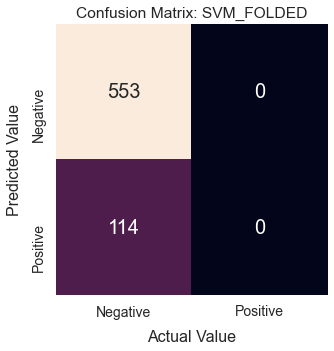

In [59]:
MakeConfMatrix("./confusionmatrices/SVM_FOLDED.json")

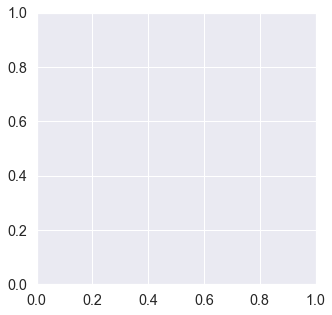

In [60]:
for i in range(len(jsonList)):
    MakeConfMatrix(jsonList[i])
    plt.clf()
    plt.cla()
    #time.sleep(2)